In [55]:
import pandas as pd
df_orders=pd.read_csv(filepath_or_buffer="data_orders.csv")
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [17]:
df_orders.shape

(10716, 8)

In [18]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


So there are missing values in m_order_eta and cancellation_time_in_seconds

In [12]:
df_offers=pd.read_csv(filepath_or_buffer="data_offers.csv")
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [13]:
df_offers.shape

(334363, 2)

In [15]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [19]:
df = df_orders.merge(right=df_offers, how="inner", on="order_gk")

In [20]:
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,300051590196
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,300051590176
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,300051648809
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,300051648910


In [21]:
import numpy as np

df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No")
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")


df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)


In [23]:
df = df.rename(columns={"order_datetime": "order_time"})

In [24]:
df

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,No,Client Cancelled
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,No,Client Cancelled
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,No,Client Cancelled
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,Yes,Client Cancelled


# Building distribution of orders according to reasons for failure

In [26]:
df['order_status'].value_counts()

Client Cancelled    21795
System Reject        9473
Name: order_status, dtype: int64

In [27]:
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [31]:
df_table = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")

In [34]:
df_table

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

<AxesSubplot:>

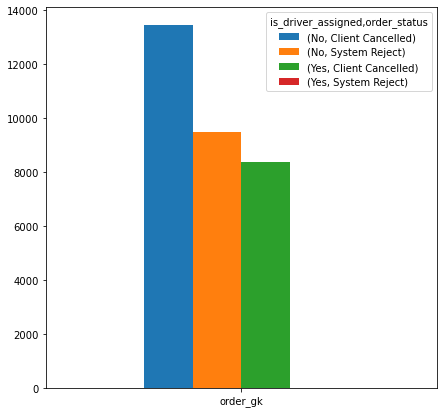

In [35]:
df_table.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

## Conclusion

No driver assigned, client cancelled order has most no of combinations followed by No driver assigned, system Reject 
followed by Driver assigned, client cancelled

# Plotting the distribution of failed orders by hours

In [36]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])

In [38]:
df.head(3)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20


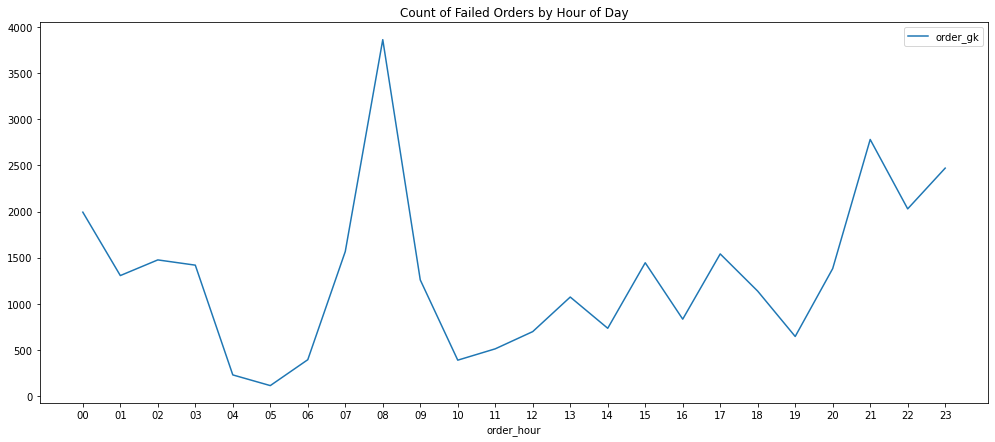

In [42]:
plot = df.groupby(by="order_hour")["order_gk"].count().plot(figsize=(17, 7),
                                                         legend=True,
                                                         xticks=range(0, 24),
                                                         title="Count of Failed Orders by Hour of Day")

It is clearly visible from plot that at around 8 in the morning, most orders get failed

DataFrame that contains such aggregated information we group-by by the order hour, the driver-assigned flag, and the order status, and then count the number of order

In [44]:
grouped_data = pd.DataFrame(df.groupby(by=["order_hour", "is_driver_assigned", "order_status"])["order_gk"].count())
grouped_data

order_gk
order_hour is_driver_assigned order_status              
00         No                 Client Cancelled       957
                              System Reject          706
           Yes                Client Cancelled       326
                              System Reject            4
01         No                 Client Cancelled       633
...                                                  ...
22         No                 System Reject          660
           Yes                Client Cancelled       415
23         No                 Client Cancelled      1144
                              System Reject          883
           Yes                Client Cancelled       444

[73 rows x 1 columns]

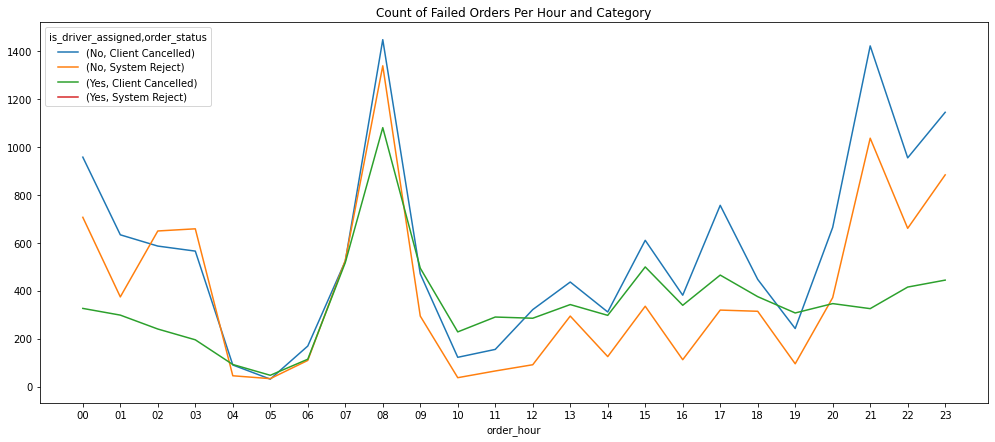

In [46]:
plot_detail = grouped_data.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(17, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

## Conclusion

The driver assigned order gets cancelled at midnight and does not follow same pattern with other two at midnight only.
Elsewhere it follows the other two

# Plotting the average time to cancellation with and without driver, by hour

In [47]:
grouped_data_avg = df.groupby(by=["order_hour", "is_driver_assigned"])["cancellations_time_in_seconds"].mean()
grouped_data_avg

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

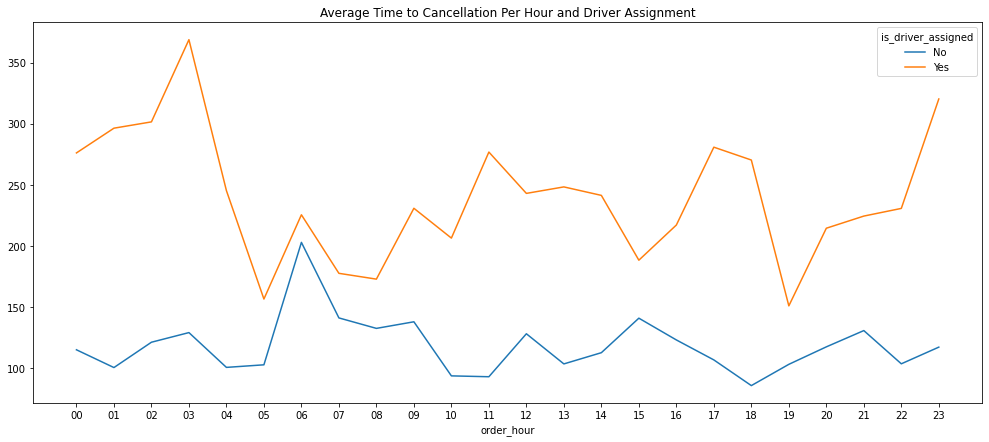

In [49]:
grouped_data_avg_plot = grouped_data_avg.reset_index().pivot(index="order_hour",
                                   columns="is_driver_assigned",
                                   values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                                figsize=(17, 7),
                                                                                title="Average Time to Cancellation Per Hour and Driver Assignment")

## Conclusion

The average time to cancellation is higher on orders with an assigned driver than without, for each hour without exception. The peak occurs at 3 A.M. At this time there are a lot of client cancellations, so a logical explanation would be that clients have waited too long for the driver.

# Plotting the distribution of average ETA by hours

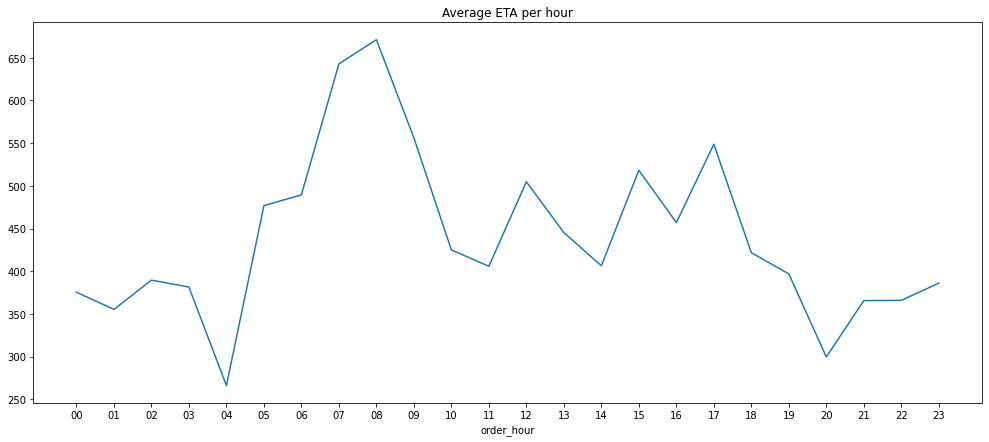

In [51]:
grouped_data_avg_ETA = df.groupby(by="order_hour")["m_order_eta"].mean().plot(figsize=(17, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")

## Conclusion

It is clearly visible from 1st plot that at around 8 in the morning, most orders get failed so average has same effect